In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
df = pd.read_csv('C:\\Users\\18053\\Desktop\\Portfolio Projects\\Weather and Energy\\Energy Demand Data\\CAISO-demand-20210825.csv')

In [94]:
df.head()

,Demand 08/25/2021,00:00,00:05,00:10,00:15,00:20,00:25,00:30,00:35,00:40,...,23:15,23:20,23:25,23:30,23:35,23:40,23:45,23:50,23:55,00:00.1
0,Day-ahead forecast,26282,25312,25312,25312,25312,25312,25312,25312,25312,...,27664,27664,27664,27664,27664,27664,27664,27664,27664,27664.0
1,Hour-ahead forecast,25541,25255,25255,25255,24874,24874,24874,24606,24606,...,28405,27853,27853,27853,27288,27288,27288,26822,26822,26822.0
2,Demand,25629,25391,25361,25329,25246,25119,25022,24888,24773,...,28494,28293,28059,27886,27689,27512,27308,27135,26895,NaN


In [95]:
daily_energy_demand =df.iloc[2,1:].sum()

In [96]:
daily_energy_demand 

8357847

In [97]:
date = df.columns[0][-10:]

In [98]:
masterdf= pd.DataFrame(columns = ['Date', 'Daily Energy Demand'])

In [99]:
masterdf

,Date,Daily Energy Demand


In [100]:
masterdf.loc[len(masterdf.index)] = [date,daily_energy_demand] 

In [101]:
masterdf

,Date,Daily Energy Demand
0,08/25/2021,8357847


In [102]:
df = pd.read_csv('C:\\Users\\18053\\Desktop\\Portfolio Projects\\Weather and Energy\\Energy Demand Data\\CAISO-demand-20210825.csv')
daily_energy_demand =df.iloc[2,1:].sum()
date = df.columns[0][-10:]
masterdf.loc[len(masterdf.index)] = [date,daily_energy_demand] 

In [103]:
import glob

set search path and glob for files

look for csv files in the input directory

In [104]:
path = 'C:\\Users\\18053\\Desktop\\Portfolio Projects\\Weather and Energy\\Energy Demand Data'
files = glob.glob(path + '/*.csv')


In [105]:
for f in files:
   
    temp_df = pd.read_csv(f)
    daily_energy_demand =temp_df.iloc[2,1:].sum()
    date = temp_df.columns[0][-10:]
    masterdf.loc[len(masterdf.index)] = [date,daily_energy_demand] 



In [106]:
masterdf

,Date,Daily Energy Demand
0,08/25/2021,8357847
1,08/25/2021,8357847
2,08/17/2021,9140771
3,08/18/2021,8273447
4,08/19/2021,8273447
...,...,...
257,04/29/2022,6350019
258,04/30/2022,5941988
259,05/01/2022,5602366
260,05/02/2022,6351495


In [107]:
masterdf.columns

Index(['Date', 'Daily Energy Demand'], dtype='object')

## 2.0 Exploratory Data Analysis

In [108]:
import seaborn as sns

In [109]:
from datetime import datetime

In [110]:
masterdf['Date_DateObj'] = masterdf['Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y').date())

In [111]:
masterdf.head()

,Date,Daily Energy Demand,Date_DateObj
0,08/25/2021,8357847,2021-08-25
1,08/25/2021,8357847,2021-08-25
2,08/17/2021,9140771,2021-08-17
3,08/18/2021,8273447,2021-08-18
4,08/19/2021,8273447,2021-08-19


<AxesSubplot:xlabel='Date', ylabel='Daily Energy Demand'>

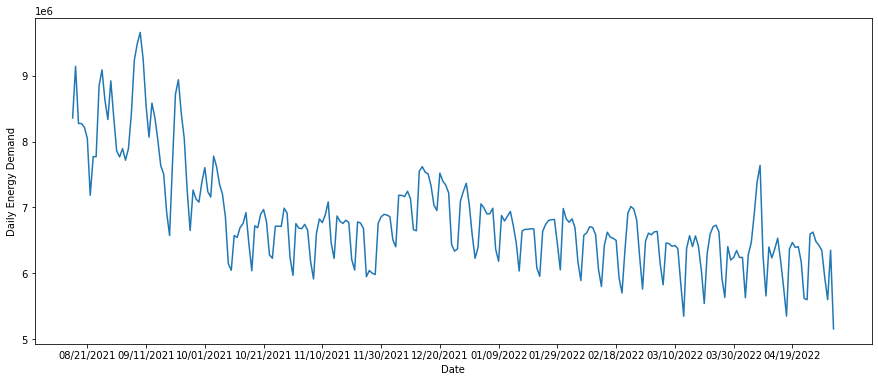

In [124]:

plt.figure(figsize=(15,6))
plt.xticks(np.arange(5, len(masterdf) +1, 20))
sns.lineplot( x ='Date', y= 'Daily Energy Demand', data = masterdf) 

<AxesSubplot:xlabel='Date', ylabel='Daily Energy Demand'>

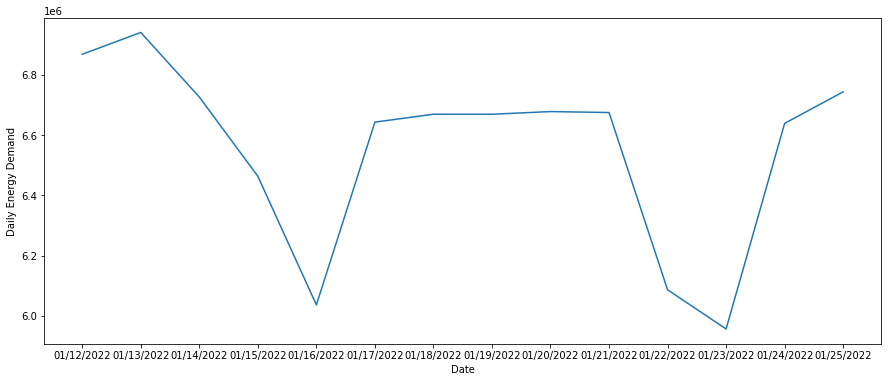

In [129]:
plt.figure(figsize=(15,6))
sns.lineplot( x ='Date', y= 'Daily Energy Demand', data = masterdf.iloc[150:164,:]) 

In [131]:
masterdf.head(7)

,Date,Daily Energy Demand,Date_DateObj
0,08/25/2021,8357847,2021-08-25
1,08/25/2021,8357847,2021-08-25
2,08/17/2021,9140771,2021-08-17
3,08/18/2021,8273447,2021-08-18
4,08/19/2021,8273447,2021-08-19
5,08/20/2021,8217546,2021-08-20
6,08/21/2021,8048332,2021-08-21


In [150]:
masterdf['Date_DateObj'] = pd.to_datetime(masterdf['Date_DateObj'])

In [151]:
masterdf['Date_DateObj']

0     2021-08-25
1     2021-08-25
2     2021-08-17
3     2021-08-18
4     2021-08-19
         ...    
257   2022-04-29
258   2022-04-30
259   2022-05-01
260   2022-05-02
261   2022-05-03
Name: Date_DateObj, Length: 262, dtype: datetime64[ns]

In [153]:
masterdf['Day']=masterdf['Date_DateObj'].dt.day_name()

In [155]:
masterdf.head(15)

,Date,Daily Energy Demand,Date_DateObj,Day
0,08/25/2021,8357847,2021-08-25,Wednesday
1,08/25/2021,8357847,2021-08-25,Wednesday
2,08/17/2021,9140771,2021-08-17,Tuesday
3,08/18/2021,8273447,2021-08-18,Wednesday
4,08/19/2021,8273447,2021-08-19,Thursday
5,08/20/2021,8217546,2021-08-20,Friday
6,08/21/2021,8048332,2021-08-21,Saturday
7,08/22/2021,7184709,2021-08-22,Sunday
8,08/23/2021,7770398,2021-08-23,Monday
9,08/24/2021,7770398,2021-08-24,Tuesday


In [156]:
masterdf = masterdf.iloc[2:,:]

In [157]:
masterdf.head(15)

,Date,Daily Energy Demand,Date_DateObj,Day
2,08/17/2021,9140771,2021-08-17,Tuesday
3,08/18/2021,8273447,2021-08-18,Wednesday
4,08/19/2021,8273447,2021-08-19,Thursday
5,08/20/2021,8217546,2021-08-20,Friday
6,08/21/2021,8048332,2021-08-21,Saturday
7,08/22/2021,7184709,2021-08-22,Sunday
8,08/23/2021,7770398,2021-08-23,Monday
9,08/24/2021,7770398,2021-08-24,Tuesday
10,08/25/2021,8357847,2021-08-25,Wednesday
11,08/26/2021,8843626,2021-08-26,Thursday


In [164]:
masterdf=masterdf.reset_index(drop=True)

In [165]:
masterdf.head()

,Date,Daily Energy Demand,Date_DateObj,Day
0,08/17/2021,9140771,2021-08-17,Tuesday
1,08/18/2021,8273447,2021-08-18,Wednesday
2,08/19/2021,8273447,2021-08-19,Thursday
3,08/20/2021,8217546,2021-08-20,Friday
4,08/21/2021,8048332,2021-08-21,Saturday


In [170]:
masterdf.to_csv('MasterDF.csv')

<AxesSubplot:xlabel='Day', ylabel='Daily Energy Demand'>

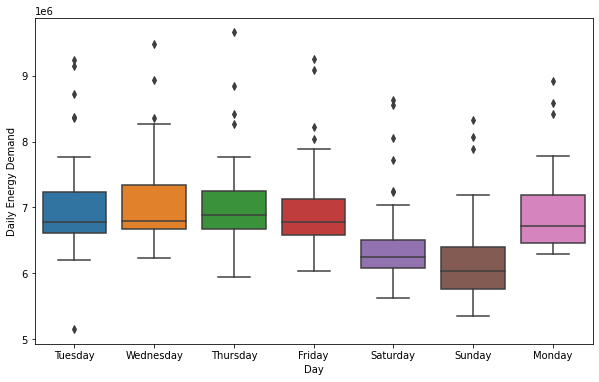

In [168]:
plt.figure(figsize=(10,6))
sns.boxplot(data = masterdf, x= 'Day', y='Daily Energy Demand')

In [169]:
masterdf.groupby('Day')['Daily Energy Demand'].describe()

,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
Friday,37.0,6.985024e+06,740162.519708,6043699.0,6588891.00,6782769.0,7133621.00,9253072.0
Monday,37.0,6.950535e+06,665988.333484,6290505.0,6460883.00,6721374.0,7185442.00,8920481.0
Saturday,37.0,6.506680e+06,719773.553790,5620620.0,6086337.00,6254515.0,6509847.00,8628135.0
Sunday,37.0,6.234944e+06,720307.004991,5350644.0,5762478.00,6040557.0,6403180.00,8334039.0
Thursday,37.0,7.081901e+06,733645.470309,5950449.0,6677589.00,6886833.0,7246630.00,9654134.0
Tuesday,38.0,7.032602e+06,823967.336225,5157444.0,6611742.75,6777301.5,7228754.75,9232733.0
Wednesday,37.0,7.071706e+06,731488.537298,6241220.0,6679009.00,6802424.0,7339288.00,9483457.0


In [180]:
masterdf
#.sort_values().drop('Day').plot.bar()

,Date,Daily Energy Demand,Date_DateObj,Day,Month
0,08/17/2021,9140771,2021-08-17,Tuesday,August
1,08/18/2021,8273447,2021-08-18,Wednesday,August
2,08/19/2021,8273447,2021-08-19,Thursday,August
3,08/20/2021,8217546,2021-08-20,Friday,August
4,08/21/2021,8048332,2021-08-21,Saturday,August
...,...,...,...,...,...
255,04/29/2022,6350019,2022-04-29,Friday,April
256,04/30/2022,5941988,2022-04-30,Saturday,April
257,05/01/2022,5602366,2022-05-01,Sunday,May
258,05/02/2022,6351495,2022-05-02,Monday,May


In [172]:
masterdf['Month'] = masterdf['Date_DateObj'].dt.month_name()

<AxesSubplot:xlabel='Month', ylabel='Daily Energy Demand'>

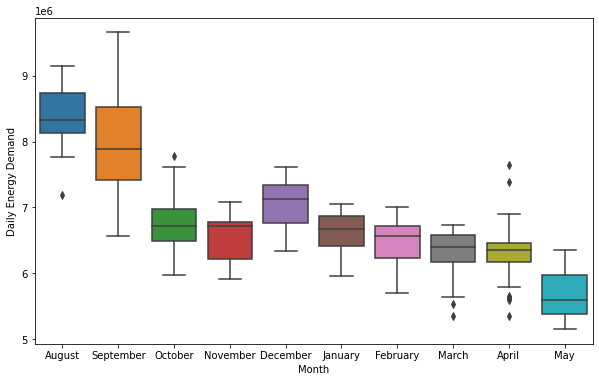

In [173]:
plt.figure(figsize=(10,6))
sns.boxplot(data = masterdf, x= 'Month', y='Daily Energy Demand')

In [174]:
masterdf.groupby('Month')['Daily Energy Demand'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
April,30.0,6.302363e+06,486647.972107,5352765.0,6179763.00,6360342.0,6468833.50,7638350.0
August,15.0,8.347806e+06,532263.246440,7184709.0,8132939.00,8334039.0,8735880.50,9140771.0
December,31.0,7.041527e+06,385834.475327,6337634.0,6761863.50,7133621.0,7334371.50,7618952.0
February,28.0,6.467344e+06,381513.735939,5703263.0,6234469.50,6564930.0,6723815.75,7014678.0
January,31.0,6.625941e+06,319751.918370,5956309.0,6422753.50,6677589.0,6873022.50,7054953.0
March,31.0,6.304368e+06,356060.803904,5350644.0,6172868.00,6407639.0,6579330.00,6731143.0
May,3.0,5.703768e+06,603449.478046,5157444.0,5379905.00,5602366.0,5976930.50,6351495.0
November,30.0,6.552358e+06,346258.440550,5916306.0,6214241.25,6715260.0,6779072.00,7085060.0
October,31.0,6.768698e+06,468846.164472,5970239.0,6496600.00,6721374.0,6979252.00,7778748.0
